In [1]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


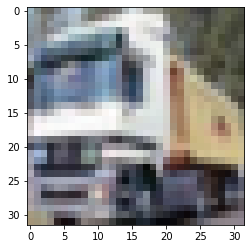

In [4]:
plt.imshow(x_train[1])

## Lipieza de datos

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [6]:
num_clases = len(np.unique(y_train))
y_train = to_categorical(y_train, num_clases)
y_test = to_categorical(y_test, num_clases)

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Normalización

In [8]:
mean = np.mean(x_train)
std = np.std(x_train)

In [9]:
x_train = (x_train - mean) / (std+1e-7)
x_test = (x_test - mean) / (std+1e-7)

## Set de datos

In [10]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

## Creación modelo convolucional

In [11]:
base_filtros = 32
w_regularaizer = 1e-4

In [12]:
model = Sequential()
##Conv 1 x_
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularaizer), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Conv 2
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularaizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

#Conv 3
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularaizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(.2))

#Conv 4
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularaizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.4))

#Conv 5
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularaizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())


#Conv 4
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularaizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.4))

## Clasificacion - Flatten
model.add(Flatten())
model.add(Dense(num_clases, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

2022-04-09 19:12:04.355642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 19:12:04.455344: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 19:12:04.456037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 19:12:04.457376: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

## Data augmentation

In [13]:
datagen = ImageDataGenerator(rotation_range=15,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  horizontal_flip=True,
                  vertical_flip=True)

## Entrenamiento modelo

In [14]:
from tensorflow.keras import optimizers

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), 
              metrics=['accuracy'])

In [16]:
# hist = model.fit(x_train, y_train, batch_size=32, epochs=10, 
#                  validation_data=(x_valid, y_valid),
#                  verbose=2, shuffle=True
#                 )

In [17]:
checkpoint = ModelCheckpoint('mi_mejor_modelo.hdf5', verbose=1, save_best_only=True, 
                             monitor='val_accuracy')

In [18]:
hist=model.fit(datagen.flow(x_train,y_train, batch_size=128),
          callbacks=[checkpoint],
          steps_per_epoch = x_train.shape[0]// 128, #steps_per_epoch = (number_of_samples_in_train_data / batch_size)
          epochs=120,
          verbose=2,
          validation_data=(x_valid, y_valid)
         )

2022-04-09 19:12:08.363751: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/120


2022-04-09 19:12:10.222156: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


351/351 - 29s - loss: 2.2522 - accuracy: 0.3168 - val_loss: 2.3454 - val_accuracy: 0.2730

Epoch 00001: val_accuracy improved from -inf to 0.27300, saving model to mi_mejor_modelo.hdf5
Epoch 2/120
351/351 - 21s - loss: 1.7518 - accuracy: 0.4234 - val_loss: 1.5497 - val_accuracy: 0.4612

Epoch 00002: val_accuracy improved from 0.27300 to 0.46120, saving model to mi_mejor_modelo.hdf5
Epoch 3/120
351/351 - 21s - loss: 1.5636 - accuracy: 0.4903 - val_loss: 1.5033 - val_accuracy: 0.5150

Epoch 00003: val_accuracy improved from 0.46120 to 0.51500, saving model to mi_mejor_modelo.hdf5
Epoch 4/120
351/351 - 21s - loss: 1.4266 - accuracy: 0.5379 - val_loss: 1.3377 - val_accuracy: 0.5568

Epoch 00004: val_accuracy improved from 0.51500 to 0.55680, saving model to mi_mejor_modelo.hdf5
Epoch 5/120
351/351 - 21s - loss: 1.3366 - accuracy: 0.5665 - val_loss: 1.3008 - val_accuracy: 0.5866

Epoch 00005: val_accuracy improved from 0.55680 to 0.58660, saving model to mi_mejor_modelo.hdf5
Epoch 6/120
351

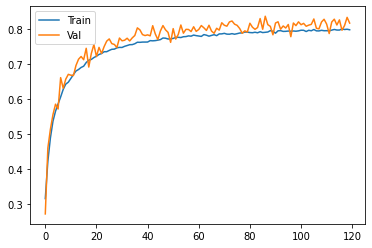

In [19]:
plt.plot(hist.history['accuracy'],label='Train')
plt.plot(hist.history['val_accuracy'],label='Val')
plt.legend()
plt.show()

In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7272 - accuracy: 0.8060


[0.7271978259086609, 0.8059999942779541]

In [21]:
model2 = model

In [22]:
model2.load_weights('./mi_mejor_modelo.hdf5')

In [23]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6352 - accuracy: 0.8359


[0.6352062821388245, 0.8359000086784363]